## PROJETO 2

#### Nome/Matrícula: Renan Vieira / 221031363

##### Utilizar os quatro classificadores estudados para classicar imagens dos datasets MNIST e CIFAR10:

* Regressão logística; 
* Análise do discriminante linear; 
* Análise do discriminante quadrático;
* Naïve Bayes;

Importando todas bibliotecas e modulos que usarei nesse notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn.naive_bayes import GaussianNB
from keras.datasets import mnist, cifar10
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix

2024-09-16 02:47:09.535975: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-16 02:47:09.545428: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-16 02:47:09.555933: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-16 02:47:09.558934: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-09-16 02:47:09.567518: I tensorflow/core/platform/cpu_feature_guar

Juntei todos os classificadores que iremos usar em dicionário para ficar mais fácil aplicá-los nos nossos datasets

In [2]:
mnist_classifiers = {
    "Regressão Logística": LogisticRegression(max_iter=1000),
    "Análise Discriminante Linear": LDA(),
    "Análise Discriminante Quadrática": QDA(),
    "Naïve Bayes": GaussianNB()
}

cifar10_classifiers = {
    "Regressão Logística": LogisticRegression(max_iter=2000),
    "Análise Discriminante Linear": LDA(),
    "Análise Discriminante Quadrática": QDA(),
    "Naïve Bayes": GaussianNB()
}

Carregando os dados do mnist e cifar10 nas nossas variáveis

In [3]:
(x_train_mnist, y_train_mnist), (x_test_mnist, y_test_mnist) = mnist.load_data()
(x_train_cifar, y_train_cifar), (x_test_cifar, y_test_cifar) = cifar10.load_data()  

Verificando as dimensões dos arrays que armazenam os dados de treinamento

In [4]:
print(f"MNIST - x_train: {x_train_mnist.shape}, y_train: {y_train_mnist.shape}")
print(f"CIFAR10 - x_train: {x_train_cifar.shape}, y_train: {y_train_cifar.shape}")

MNIST - x_train: (60000, 28, 28), y_train: (60000,)
CIFAR10 - x_train: (50000, 32, 32, 3), y_train: (50000, 1)


Função para pé-processar os dados:
* Trasformar  as imagens em vetores unidimensionais utilizando o reshape
* Normalizar os valores dos pixels para o intervalo [0, 1] para melhorar (ou pelo menos tentar) o desempenho dos algorítmos usados

In [5]:
def preprocess_data(x_train, x_test):
    x_train = x_train.reshape((x_train.shape[0], -1)).astype('float32') / 255.0
    x_test = x_test.reshape((x_test.shape[0], -1)).astype('float32') / 255.0
    return x_train, x_test

Função para realizar o treinamento e a avaliação dos nossos classificadores por meio  da 'accuracy_score' que calcula a acurácia, que é a proporção de previsões corretas em relação ao total de previsões. Ela compara os rótulos verdadeiros y_test com os rótulos previstos y_pred

In [6]:
def apply_classifier(clf, x_train, y_train, x_test, y_test, dataset_name):
    clf.fit(x_train, y_train)
    y_pred = clf.predict(x_test)
    acc =  accuracy_score(y_test, y_pred)
    print(f"Acurácia {clf.__class__.__name__} no {dataset_name}: {acc*100:.2f}%")
    return clf.score(x_test, y_test)

Função para termos uma visualização dos resultados de classificação de um modelo em um conjunto de dados de teste. Ela exibe imagens de amostras do conjunto de teste, junto com as previsões do classificador e os rótulos verdadeiros.

In [7]:
def show_classification_results(clf, x_test, y_test, dataset_name, num_samples=10):
    y_pred = clf.predict(x_test)

    # Selecionar algumas amostras aleatórias para visualização
    indices = np.random.choice(range(x_test.shape[0]), num_samples, replace=False)
    sample_images = x_test[indices]
    sample_labels = y_test[indices]
    sample_preds = y_pred[indices]

    # Plotar as imagens e suas previsões
    plt.figure(figsize=(20, 8))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(sample_images[i].reshape(28, 28), cmap='gray')
        plt.title(f"Pred: {sample_preds[i]}\nTrue: {sample_labels[i]}")
        plt.axis('off')
    
    plt.suptitle(f"Classificações por {clf.__class__.__name__} no {dataset_name}")
    plt.show()

Função para gerar uma matriz de confusão

In [8]:
def plot_confusion_matrix(y_true, y_pred, class_names, classifier_name):
    # Gerar a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    
    # Plotar a matriz de confusão
    plt.figure(figsize=(10, 7))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.title(f'Matriz de Confusão - {classifier_name}')
    plt.xlabel('Predito')
    plt.ylabel('Verdadeiro')
    plt.show()

### Pau na máquina

Começaremos com os nossos trabalahos com o MNIST. Para isso, primeiro iremos pré-processar os dados dele (que é transformar a imagem em um vetor unidimensional e com os valores dos pixels normalizados) e dividí-los em dados treinamento e de teste

In [9]:
x_train_mnist, x_test_mnist = preprocess_data(x_train_mnist, x_test_mnist)
x_train_mnist, x_test_mnist, y_train_mnist, y_test_mnist = train_test_split(x_train_mnist, y_train_mnist, test_size=0.2, random_state=42)

Aplica os classificafores no MNIST

In [10]:
for name, clf in mnist_classifiers.items():
    apply_classifier(clf, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, "MNIST")

Acurácia LogisticRegression no MNIST: 92.20%
Acurácia LinearDiscriminantAnalysis no MNIST: 86.79%


/home/renan/Faculdade/TEMA/projetos/projeto-2/sla/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Acurácia QuadraticDiscriminantAnalysis no MNIST: 15.20%
Acurácia GaussianNB no MNIST: 56.01%


A seguir temos tentativas fracassadas de retirar esse warning de avisando do efeito da covariância no uso do QDA, porém, como é possível ver a seguir, essa tentativa acaba sendo falha. O lado bom é que pesquisando maneiras de contornar esse Warning, eu descobri um parametro utilizado no classificador QDA que, apesar de não remover o warning, ele aumenta consideravelmente a acurácia do mesmo. Ele basicamente aplica a regularização (shrinkage), o que por sua vez reduz a sensibilidade do modelo a colinearidade.

In [11]:
# Escalar os dados
scaler = StandardScaler()
x_train_mnist_scaled = scaler.fit_transform(x_train_mnist)
x_test_mnist_scaled = scaler.transform(x_test_mnist)


# Aplicar PCA para reduzir a colinearidade
pca = PCA(n_components=0.95)  # Mantém 95% da variância
x_train_mnist_pca = pca.fit_transform(x_train_mnist)
x_test_mnist_pca = pca.transform(x_test_mnist)

mnist_classifiers["Análise Discriminante Quadrática"] = QDA(reg_param=0.1)

for name, clf in mnist_classifiers.items():
    apply_classifier(clf, x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, "MNIST")

Acurácia LogisticRegression no MNIST: 92.20%
Acurácia LinearDiscriminantAnalysis no MNIST: 86.79%


/home/renan/Faculdade/TEMA/projetos/projeto-2/sla/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Acurácia QuadraticDiscriminantAnalysis no MNIST: 95.19%
Acurácia GaussianNB no MNIST: 56.01%


E para visualizarmos essa acurácia, temos exemplos de classificações feitas por cada modelo

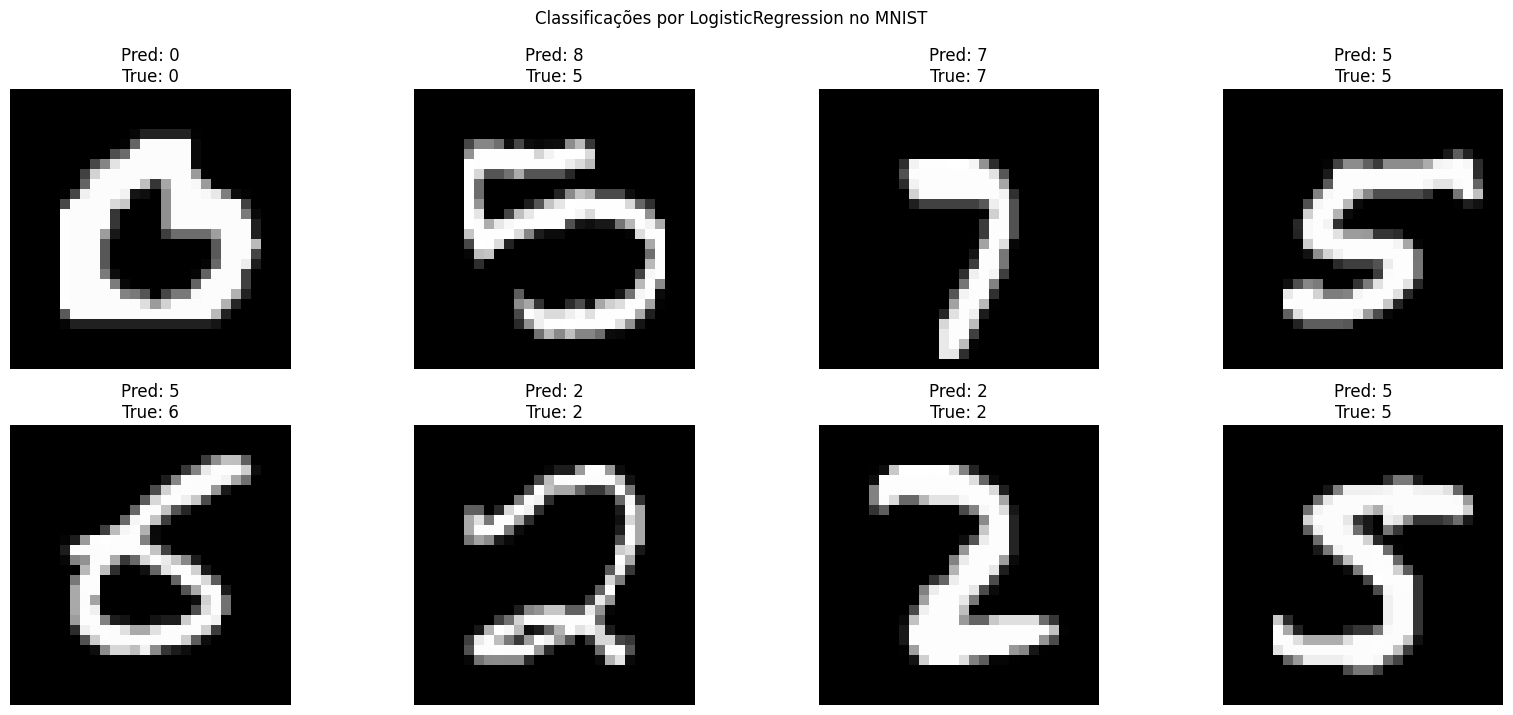

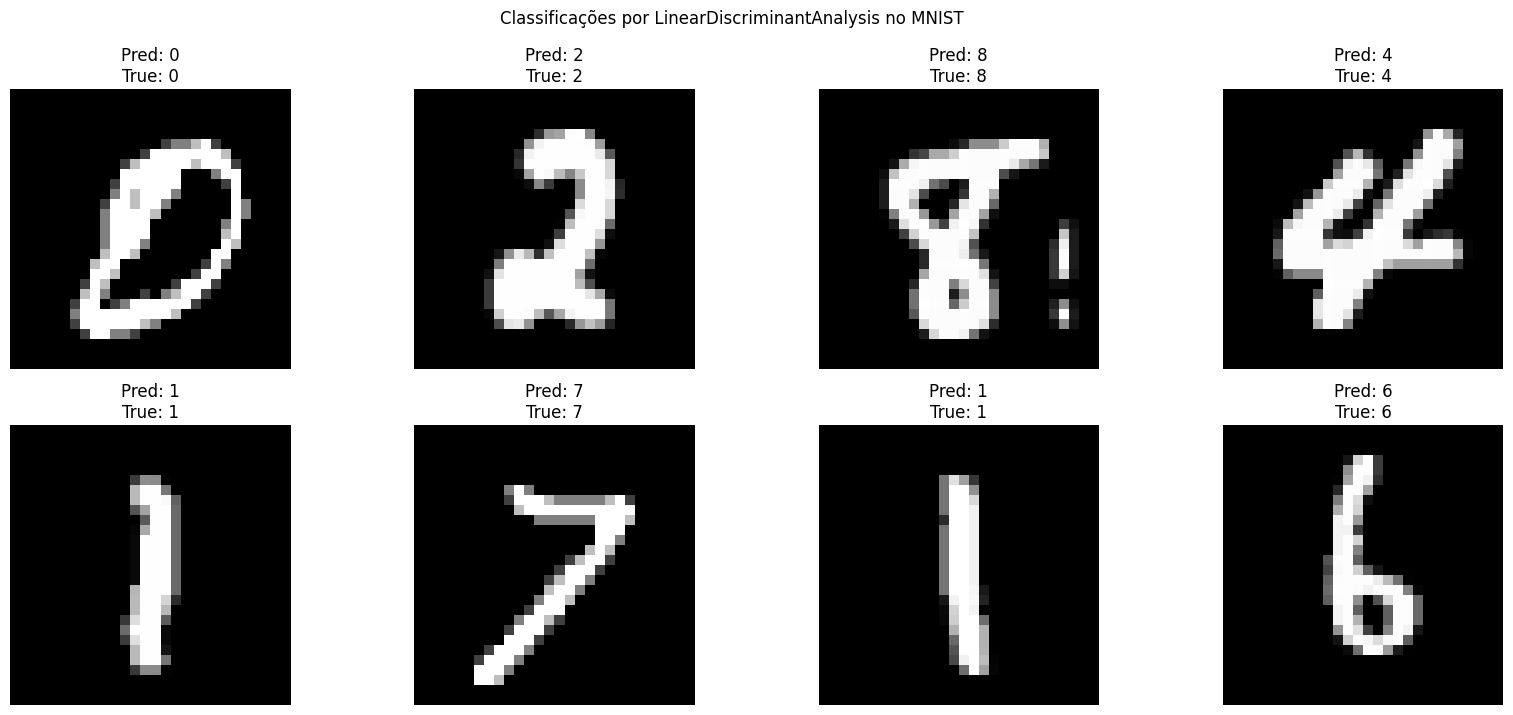

/home/renan/Faculdade/TEMA/projetos/projeto-2/sla/lib/python3.12/site-packages/sklearn/discriminant_analysis.py:947: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


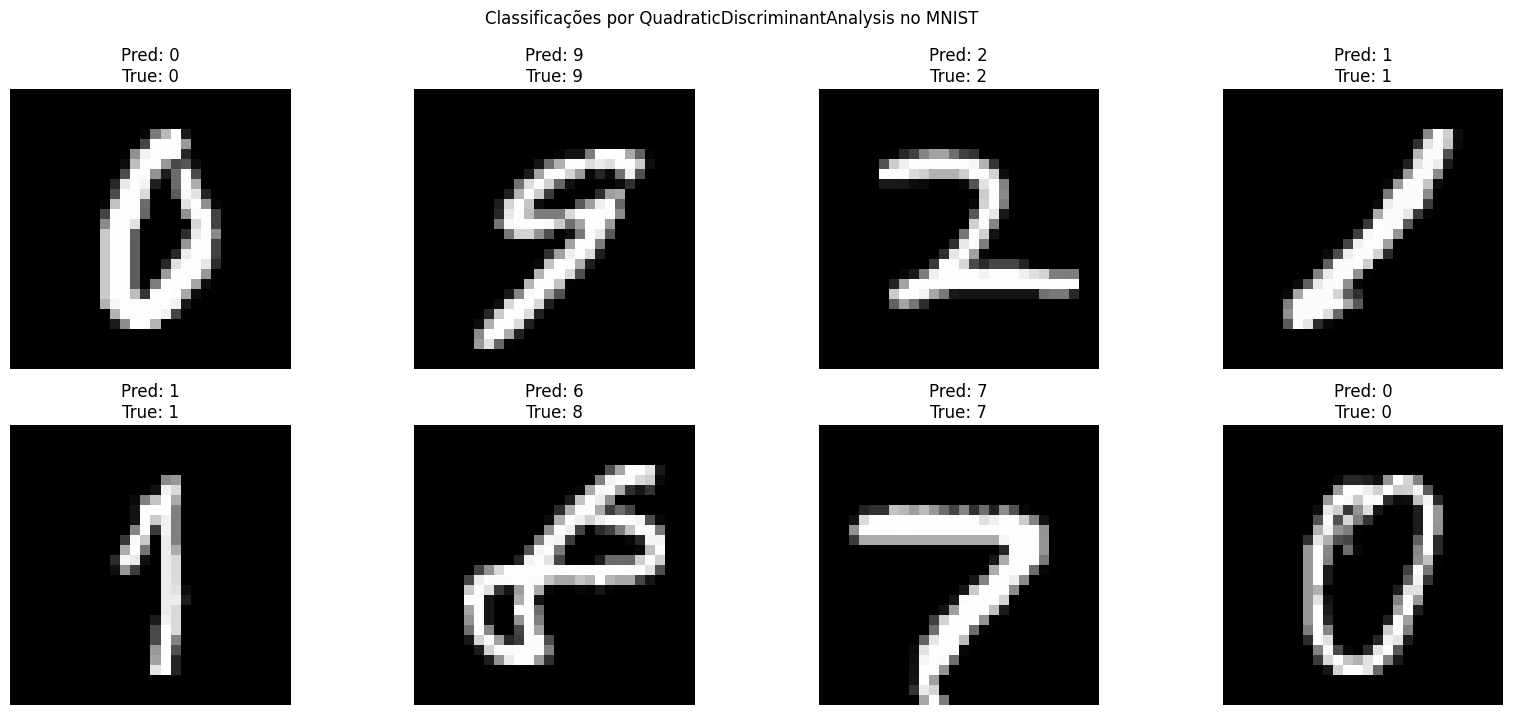

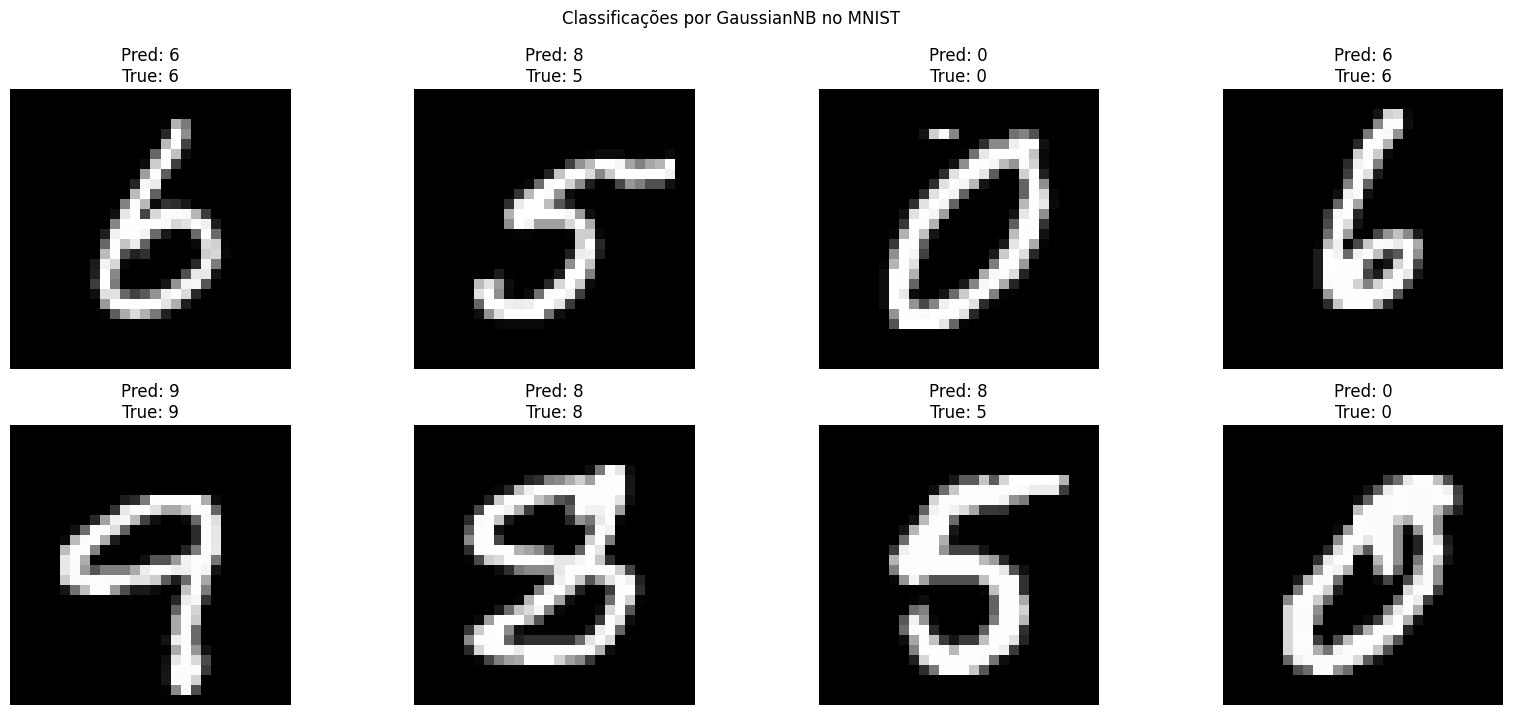

In [12]:
for name, clf in mnist_classifiers.items():
    clf.fit(x_train_mnist, y_train_mnist)  # Treinar o classificador
    show_classification_results(clf, x_test_mnist, y_test_mnist, "MNIST", num_samples=8)

E, por fim, temos a queridinha de todos: a Matriz de Confusão para cada classificador

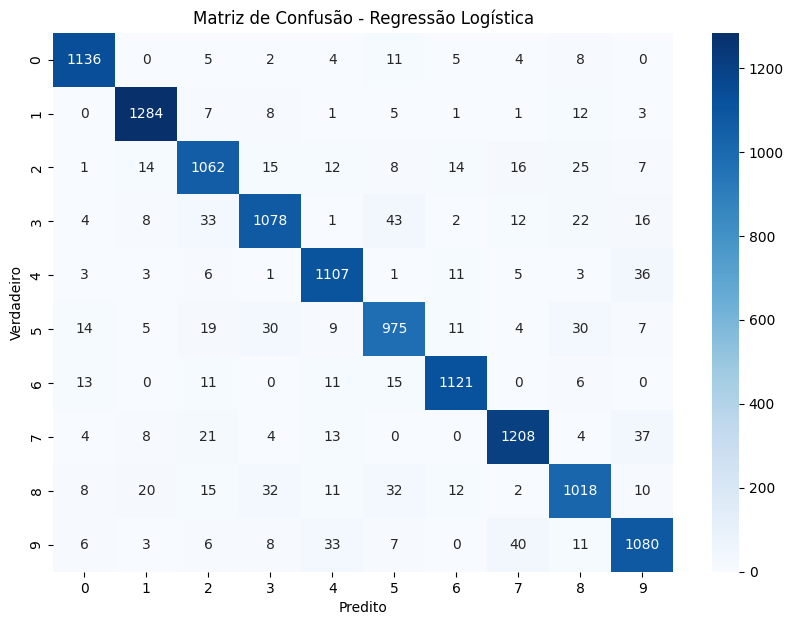

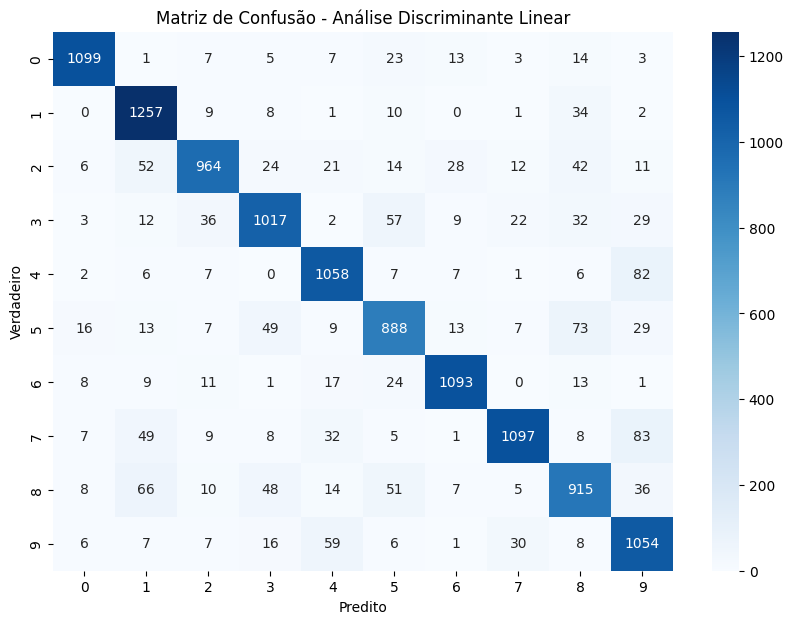

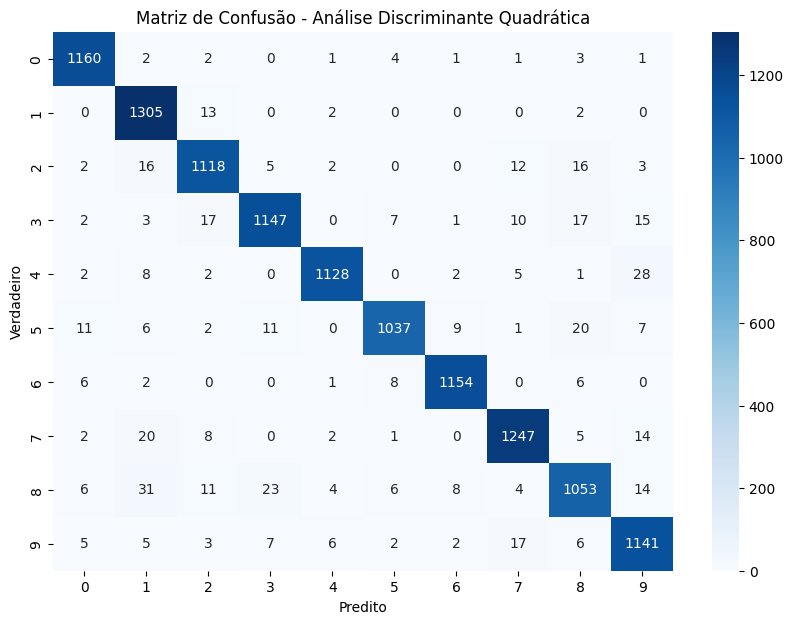

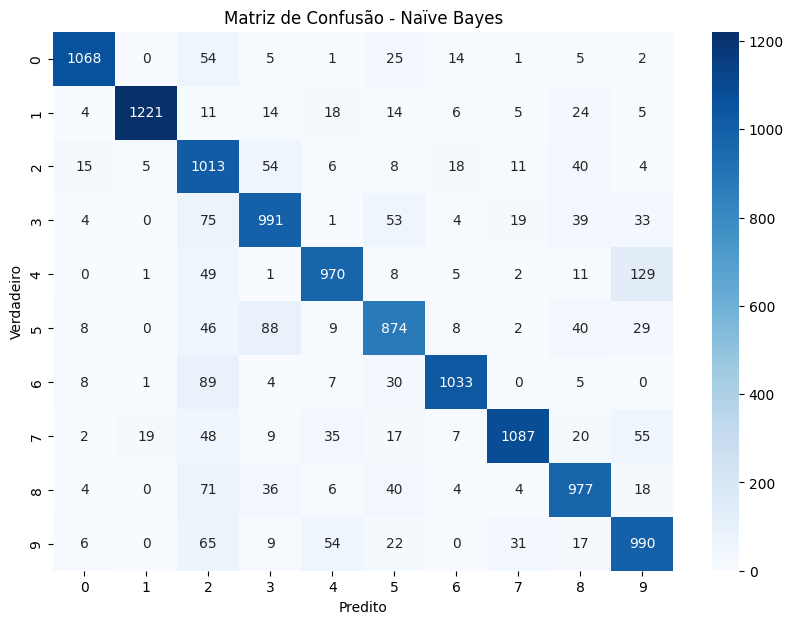

In [13]:
class_names = [str(i) for i in range(10)]

for name, clf in mnist_classifiers.items():
    # Treinar o classificador
    clf.fit(x_train_mnist_pca, y_train_mnist)
    
    # Fazer predições
    y_pred = clf.predict(x_test_mnist_pca)
    
    # Exibir a matriz de confusão
    plot_confusion_matrix(y_test_mnist, y_pred, class_names, name)

Agora faremos os menos procedimentos no CIFAR10, eu irei evitarei o uso de algumas legendas para não ficar repetido

In [14]:
x_train_cifar, x_test_cifar = preprocess_data(x_train_cifar, x_test_cifar)
x_train_cifar, x_test_cifar, y_train_cifar, y_test_cifar = train_test_split(x_train_cifar, y_train_cifar, test_size=0.2, random_state=42)

In [15]:
print(f"Tamanho de x_train: {x_train_cifar.shape}, y_train: {y_train_cifar.shape}")
print(f"Tamanho de x_test: {x_test_cifar.shape}, y_test: {y_test_cifar.shape}")

Tamanho de x_train: (40000, 3072), y_train: (40000, 1)
Tamanho de x_test: (10000, 3072), y_test: (10000, 1)


OBS: A celula a seguir e as de vizualição podem levar por volta de 15min pra rodar por conta do grande número de imagens e à alta dimensionalidade do CIFAR10 (32x32x3)

In [27]:
for name, clf in cifar10_classifiers.items():
    apply_classifier(clf, x_train_cifar, y_train_cifar.ravel(), x_test_cifar, y_test_cifar.ravel(), "CIFAR10")

Acurácia LogisticRegression no CIFAR10: 37.85%
Acurácia LinearDiscriminantAnalysis no CIFAR10: 36.28%
Acurácia QuadraticDiscriminantAnalysis no CIFAR10: 29.55%
Acurácia GaussianNB no CIFAR10: 28.38%


Adaptação da função de visualização para o cifar10

In [25]:
def show_classification_results_cifar(clf, x_test, y_test, dataset_name, class_names, num_samples=8):
    y_pred = clf.predict(x_test)
    
    # Certifique-se de que y_test seja um array 1D
    y_test = y_test.ravel()
    
    # Selecionar algumas amostras aleatórias para visualização
    indices = np.random.choice(range(x_test.shape[0]), num_samples, replace=False)
    sample_images = x_test[indices]
    sample_labels = y_test[indices]
    sample_preds = y_pred[indices]
    
    # Plotar as imagens e suas previsões
    plt.figure(figsize=(20, 8))
    for i in range(num_samples):
        plt.subplot(2, num_samples // 2, i + 1)
        plt.imshow(sample_images[i].reshape(32, 32, 3))  # CIFAR10 tem 32x32 e 3 canais (RGB)
        
        # Converter índices numéricos para nomes de classes
        pred_class = class_names[int(sample_preds[i])]
        true_class = class_names[int(sample_labels[i])]
        
        plt.title(f"Pred: {pred_class}\nTrue: {true_class}")
        plt.axis('off')
    plt.suptitle(f"Classificações por {clf.__class__.__name__} no {dataset_name}")
    plt.tight_layout()
    plt.show()

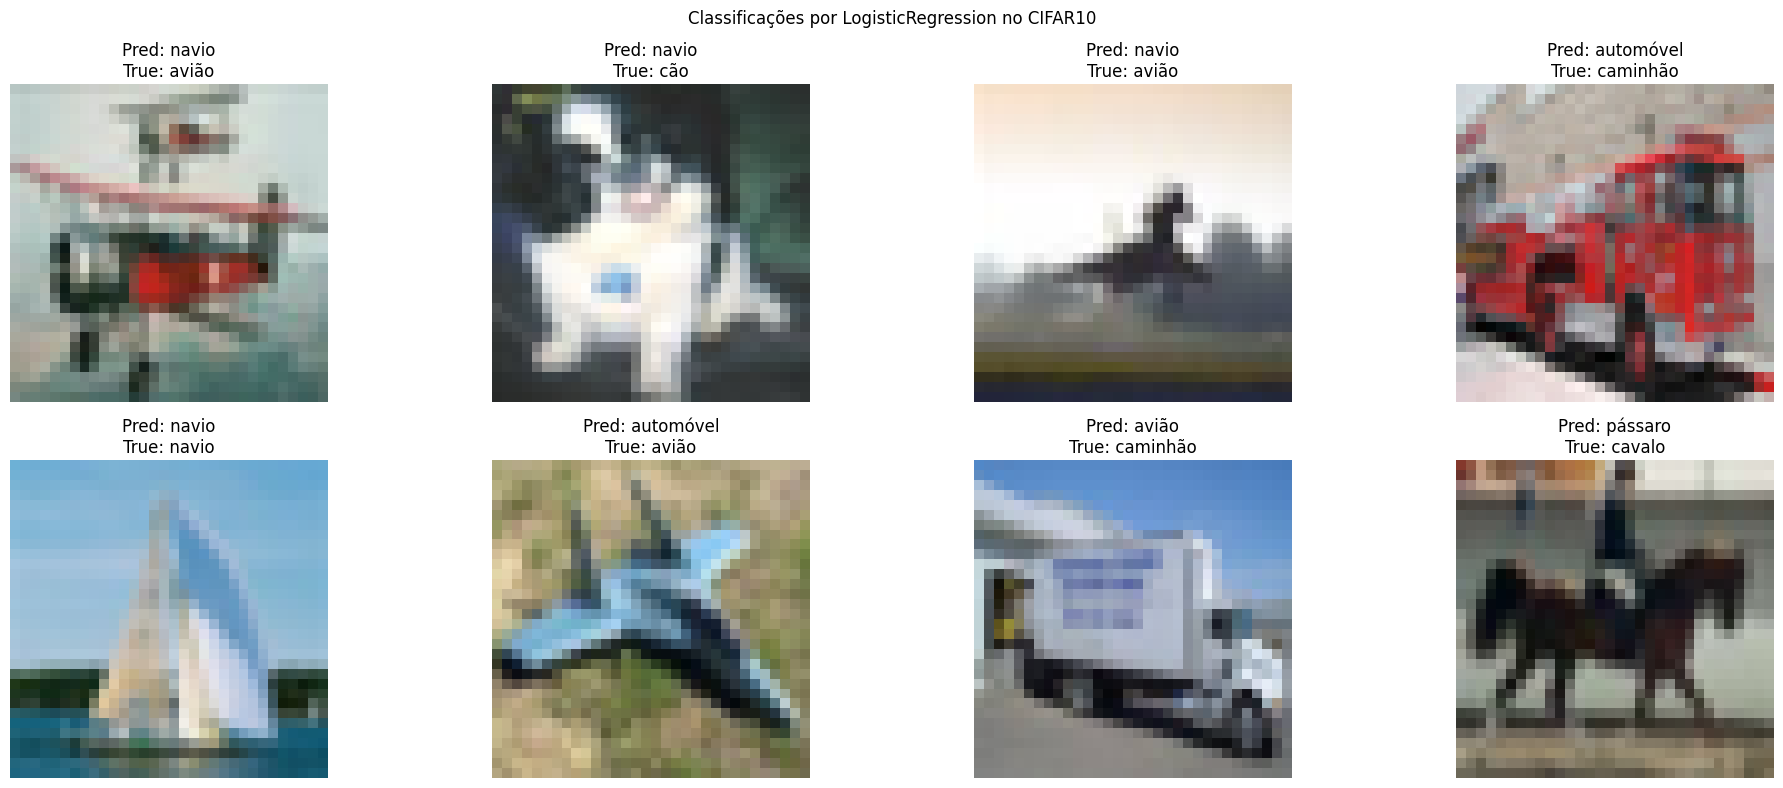

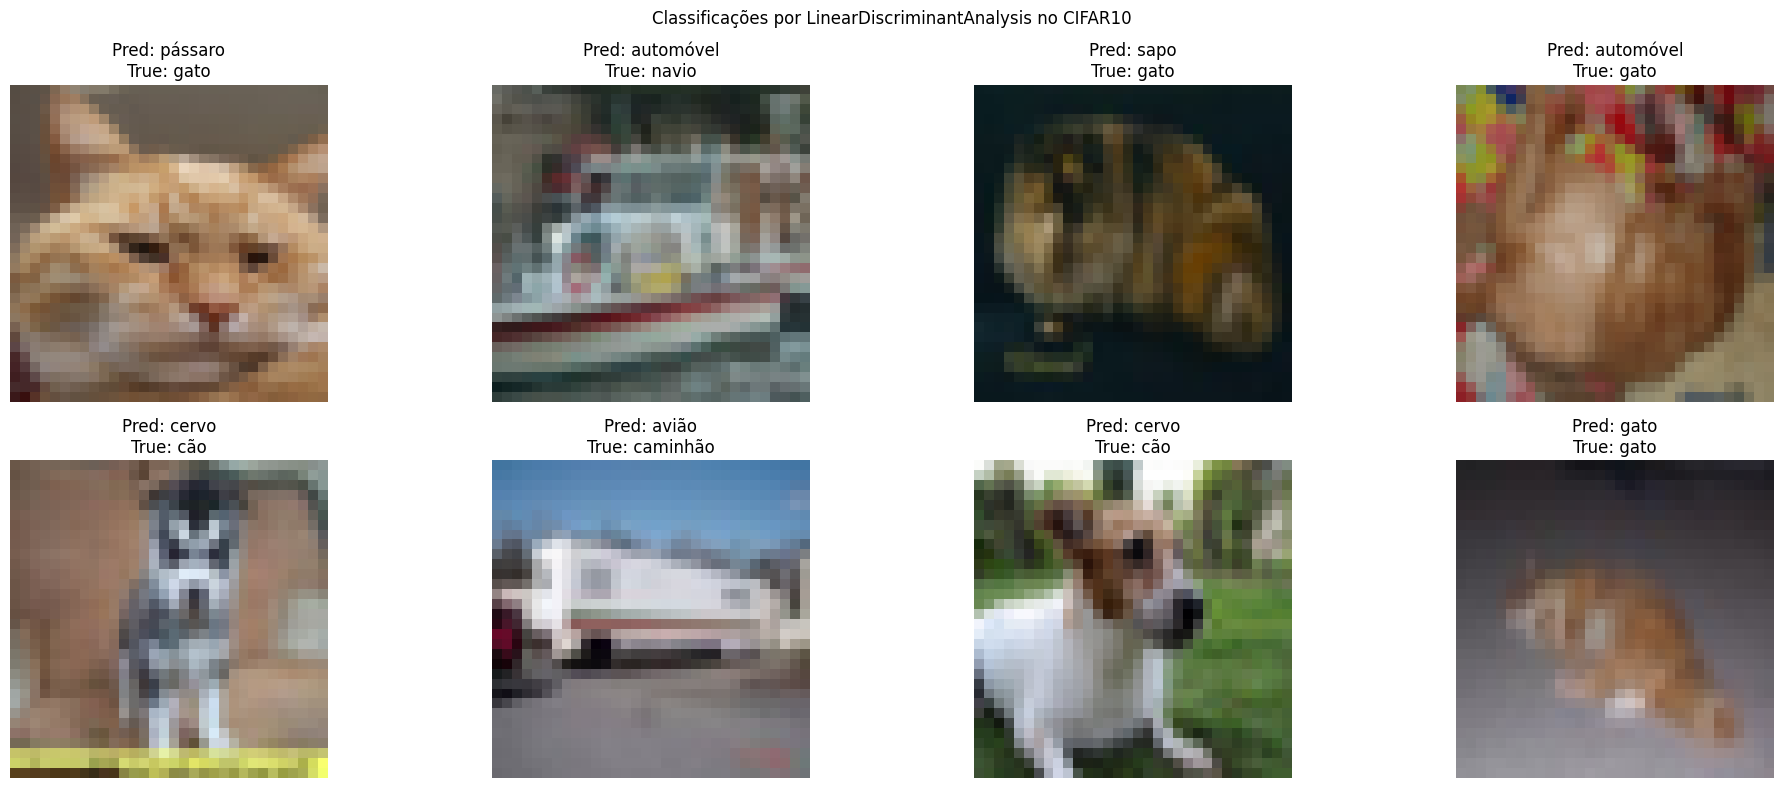

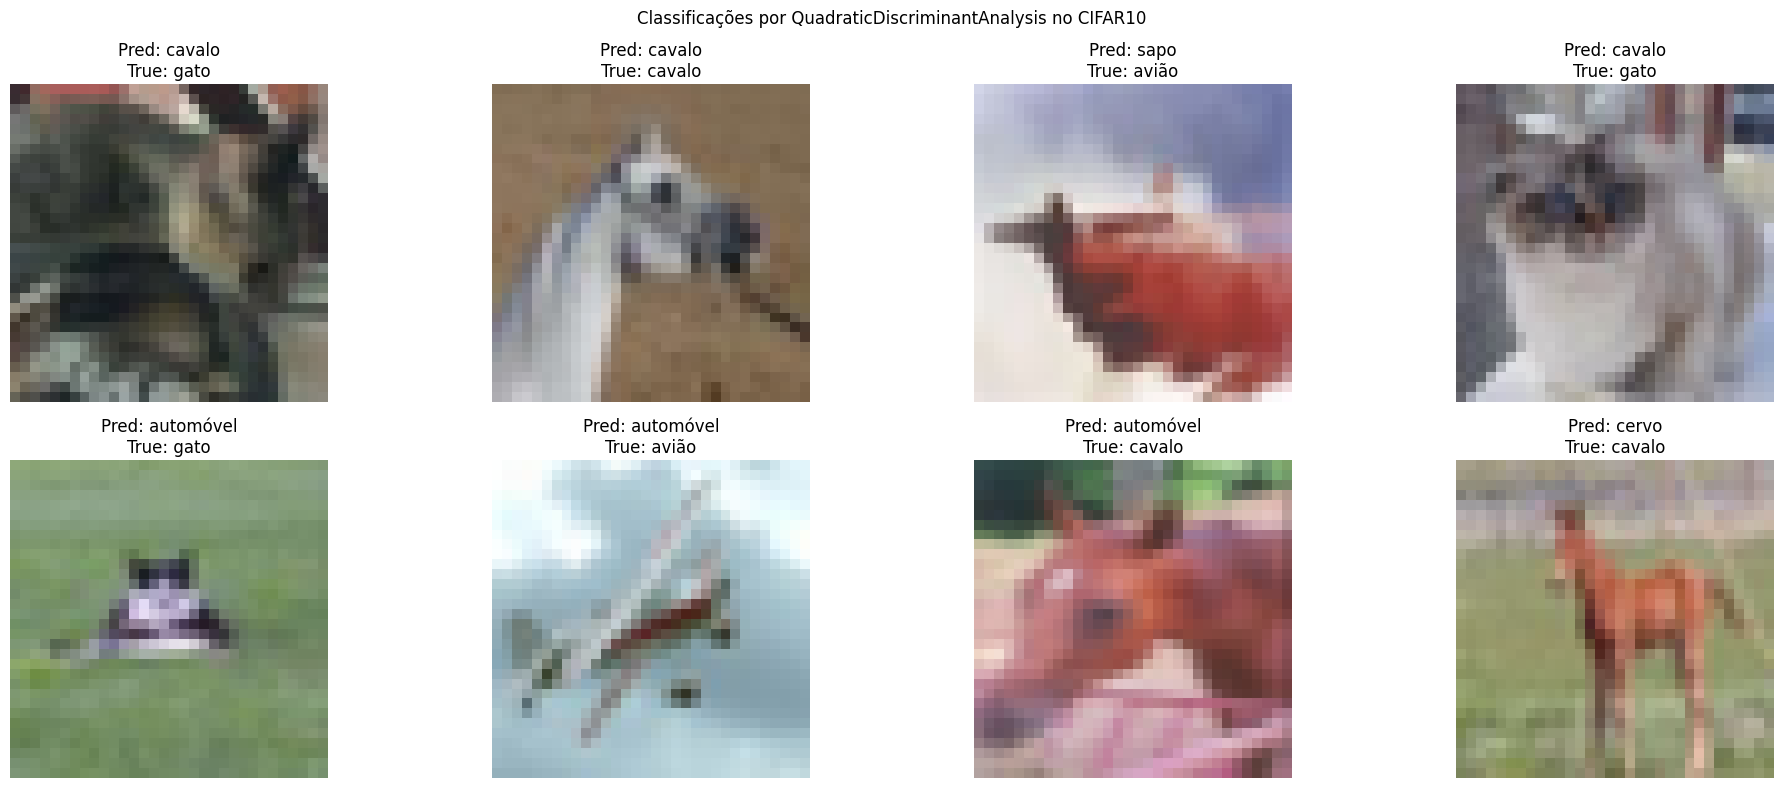

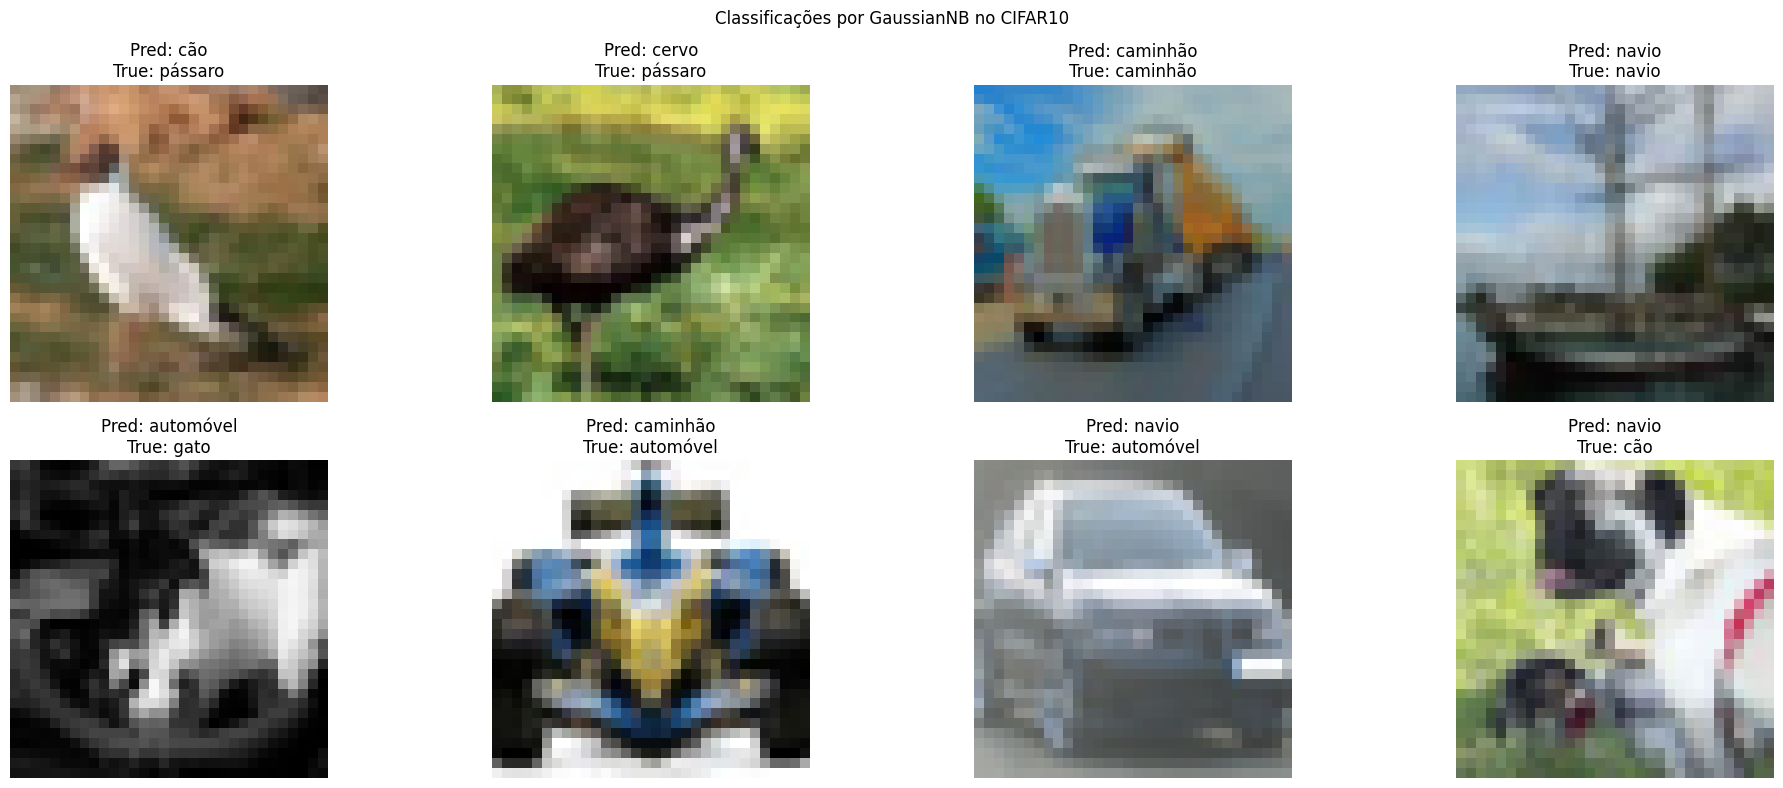

In [26]:
class_names = ['avião', 'automóvel', 'pássaro', 'gato', 'cervo', 'cão', 'sapo', 'cavalo', 'navio', 'caminhão']

for name, clf in cifar10_classifiers.items():
    clf.fit(x_train_cifar, y_train_cifar.ravel())  # Treinar o classificador
    show_classification_results_cifar(clf, x_test_cifar, y_test_cifar, "CIFAR10", class_names)

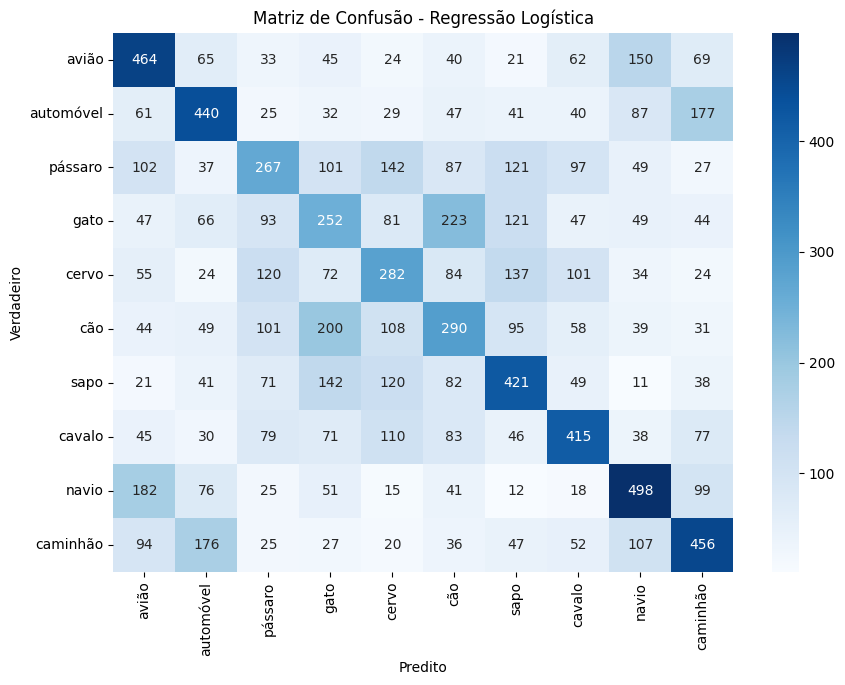

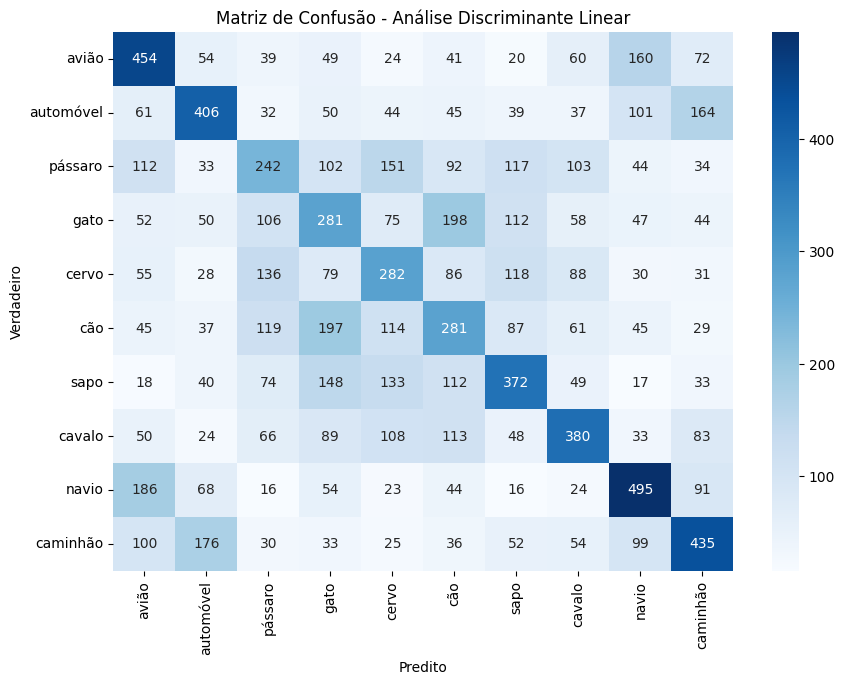

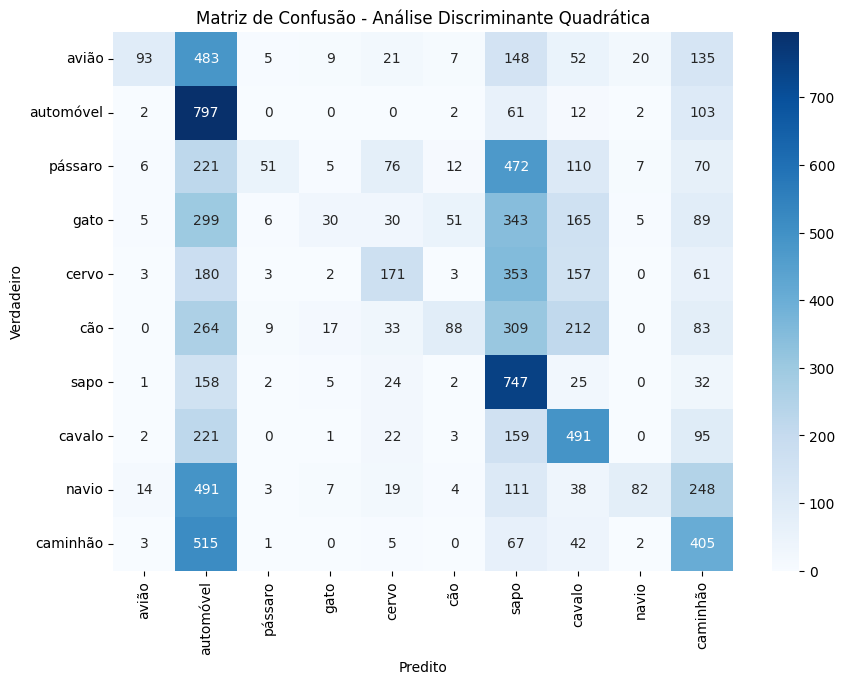

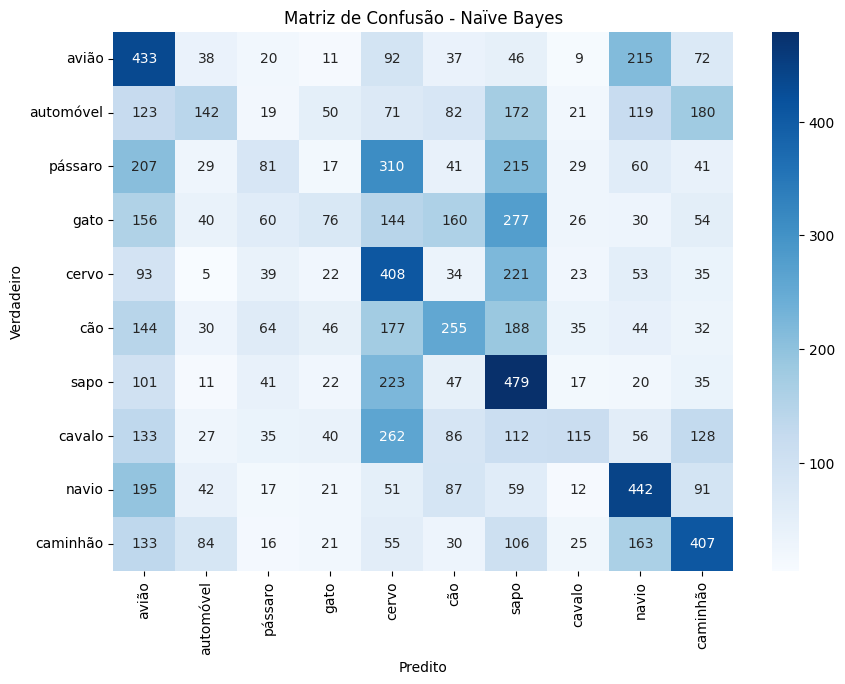

In [22]:
for name, clf in cifar10_classifiers.items():
    # Treinar o classificador
    clf.fit(x_train_cifar, y_train_cifar.ravel())
    
    # Fazer predições
    y_pred = clf.predict(x_test_cifar)
    
    # Exibir a matriz de confusão
    plot_confusion_matrix(y_test_cifar, y_pred, class_names, name)

### Considerações Finais sobre o Desempenho dos Classificadores no MNIST e CIFAR10

Os resultados obtidos mostram diferenças claras no desempenho dos classificadores entre os datasets MNIST e CIFAR10, refletindo o nível de complexidade de cada um.

1. MNIST 

    * ```Logistic Regression``` (92.20%) e ```Linear Discriminant Analysis``` (86.79%): Esses dois métodos lineares se saíram muito bem no MNIST, como esperado. As imagens de dígitos são simples, e os modelos conseguem identificar padrões básicos de forma eficiente. A alta precisão de ambos mostra que, para dados mais "organizados" e consistentes como os dígitos manuscritos, esses classificadores conseguem fazer um bom trabalho.
    * ```Quadratic Discriminant Analysis (QDA)``` (95.19%): O QDA, curiosamente, teve a melhor performance no MNIST. Isso sugere que o modelo foi capaz de capturar relações um pouco mais complexas entre os pixels das imagens, o que ajudou na classificação de forma mais precisa.
    * ```Gaussian Naive Bayes``` (56.01%): O Naive Bayes, por outro lado, não se saiu tão bem. Como ele assume que os pixels são independentes uns dos outros, ele não consegue capturar as relações entre os pixels de forma tão eficiente, o que resulta em uma performance bem mais baixa.

No geral, o desempenho nos dados do MNIST foi bom para quase todos os classificadores, o que confirma que o MNIST é um dataset relativamente simples e fácil de trabalhar, mesmo para modelos mais básicos.

2. CIFAR10

    * ```Logistic Regression``` (37.85%) e ```Linear Discriminant Analysis``` (36.28%): Aqui vemos uma queda drástica na precisão. O CIFAR10 é muito mais complicado que o MNIST. São imagens coloridas e com objetos muito variados, o que torna a tarefa de classificação muito mais desafiadora para modelos lineares, que não conseguem capturar as complexidades das formas, cores e texturas presentes nas imagens.
    * ```Quadratic Discriminant Analysis``` (29.55%): O QDA, que foi excelente no MNIST, não conseguiu manter o bom desempenho no CIFAR10. Isso acontece porque a maior complexidade das imagens exige abordagens mais robustas, e o modelo quadrático também enfrenta dificuldades com a colinearidade dos dados.
    * ```Gaussian Naive Bayes``` (28.38%): Como no MNIST, o Naive Bayes teve um desempenho fraco. Esse modelo faz uma suposição muito simplista sobre a independência dos pixels, o que não funciona bem com imagens complexas e coloridas como as do CIFAR10, onde há muitas interações entre as cores e as formas.

3. Reflexões Finais

Esses resultados mostram que enquanto o MNIST é um dataset onde modelos mais simples conseguem ter um bom desempenho, o CIFAR10 demanda classificadores mais sofisticados. As imagens do MNIST são bastante homogêneas (dígitos simples em escala de cinza), e isso facilita a tarefa de classificação. Já o CIFAR10 contém uma grande variedade de objetos e cores, o que torna o problema muito mais desafiador.

Isso mostra que, para resolver problemas mais complexos, como o CIFAR10, é preciso considerar modelos mais avançados, como redes neurais ou classificadores que consigam capturar padrões não-lineares de forma eficiente. Modelos lineares e simples não são suficientes quando lidamos com imagens tão variadas.

Em resumo, os classificadores testados mostram boas performances em dados mais simples, como o MNIST, mas para lidar com a complexidade do CIFAR10, precisaremos de técnicas mais robustas e poderosas, capazes de capturar as nuances presentes nas imagens coloridas e variadas.